# Imports

In [22]:
import pandas as pd
import numpy as np
import scipy

# sklearn
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# deep learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Load DataSet

In [13]:
df1 = pd.DataFrame(pd.read_excel('./data/X_bp.xlsx', index_col=0))
df1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [9]:
df2 = pd.DataFrame(pd.read_excel('./data/X_nup.xlsx', index_col=0))
df2

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.000000,57.000000
1,0,4.000000,60.000000
2,0,4.000000,70.000000
3,0,5.000000,47.000000
4,0,5.000000,57.000000
...,...,...,...
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479


In [46]:
df = pd.concat([df1, df2], join='inner', axis=1)
df.sample(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
395,2.498733,2057.949554,334.480077,91.281155,22.520609,266.544562,271.233253,77.039472,3441.764986,174.374939,0,7.798752,37.191773
684,4.594119,1935.851491,626.971764,125.843579,20.919002,274.225679,505.856488,74.026399,3130.333642,326.703575,90,4.446795,56.260700
93,4.271977,1876.168046,560.960951,63.511846,26.039089,289.494316,237.688172,76.439841,2155.862285,188.756824,0,7.534357,37.495136
755,3.104559,1858.862775,307.232901,84.541511,27.920843,223.294202,415.463131,70.713530,2347.684613,248.318925,90,7.213099,50.353296
499,1.813906,2170.342363,909.682529,89.333827,18.825181,270.810351,95.648447,71.933723,3047.474139,238.096456,0,1.626690,51.829634


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки           

In [20]:
df_cor = df.corr()
df_cor

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


<Axes: >

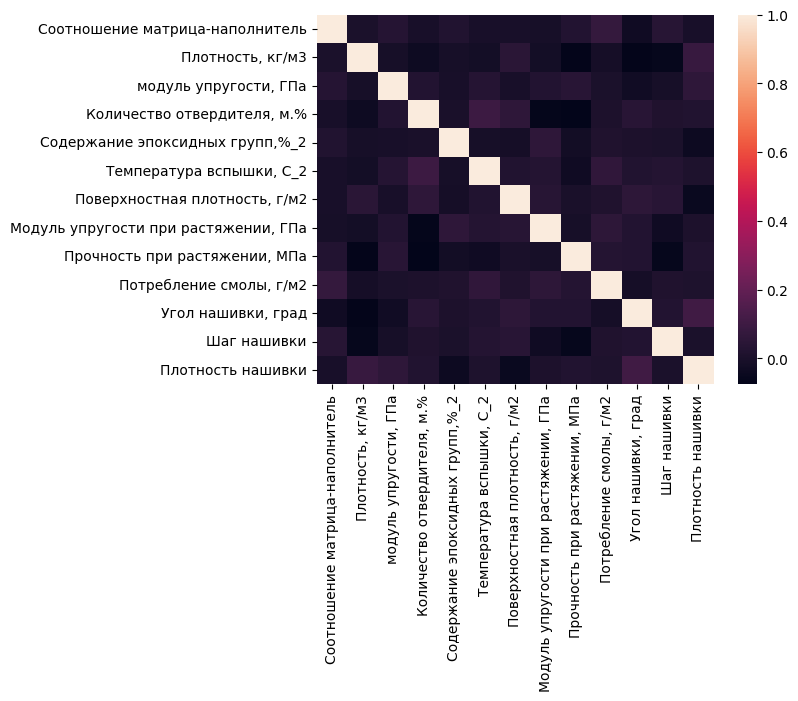

In [23]:
sns.heatmap(df_cor) 

In [44]:
# df_cor.loc[:, ] 
column = df_cor.columns.tolist()
column

['Соотношение матрица-наполнитель',
 'Плотность, кг/м3',
 'модуль упругости, ГПа',
 'Количество отвердителя, м.%',
 'Содержание эпоксидных групп,%_2',
 'Температура вспышки, С_2',
 'Поверхностная плотность, г/м2',
 'Модуль упругости при растяжении, ГПа',
 'Прочность при растяжении, МПа',
 'Потребление смолы, г/м2',
 'Угол нашивки, град',
 'Шаг нашивки',
 'Плотность нашивки']

In [45]:
df_cor.loc[(df_cor[column] > 10)]

KeyError: ('Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки')

<Figure size 1500x1500 with 0 Axes>

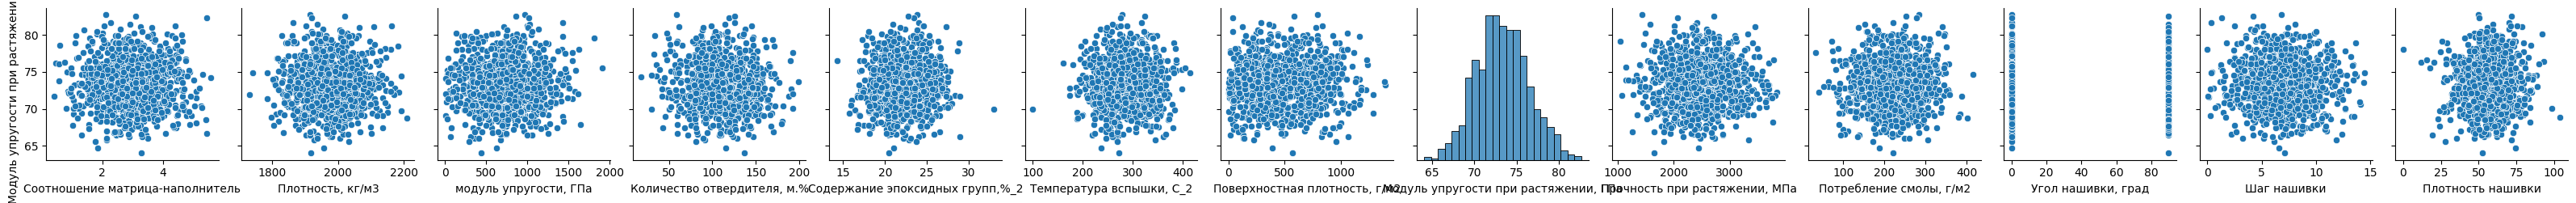

In [84]:
# fig, axs = plt.subplots(3, figsize = (5,5))
plt.figure(figsize=(15,15))
g = sns.pairplot(df, y_vars='Модуль упругости при растяжении, ГПа') 
                 # diag_kind='kde', 
                 # plot_kws={'alpha': 0.2},  
                 # plot_kws=dict(s=80, edgecolor="white", linewidth=2.5),
                 # height=10, 
                 # aspect=0.6)
# g.fig.set_figheight(5)
# g.fig.set_figwidth(50)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

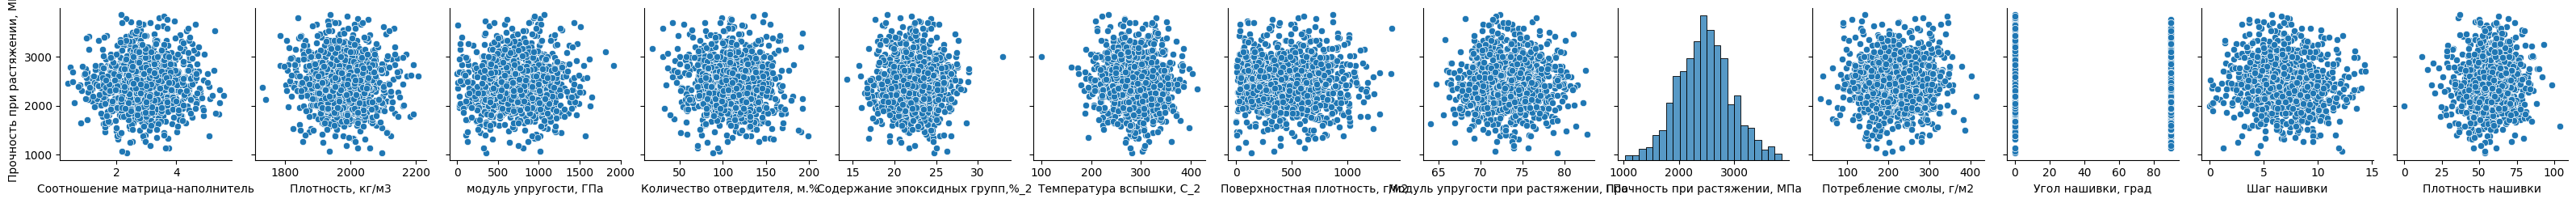

In [48]:
sns.pairplot(df, y_vars='Прочность при растяжении, МПа', height= 6 , aspect= 1.5 )
plt.show()